# Tables

Last session, we talked about dictionaries. In fact, we implemented a procedure that built a big dictionary of dictionaries from a csv file. Today, we'll talk about ways to process data as a *table* rather than a dictionary. 

In [152]:
import pandas
import pysal
%matplotlib inline

Pandas is the [python data anlysis library](http://pandas.pydata.org). It's [incredibly powerful](https://vimeo.com/59324550). We'll just cover some basic functions of pandas for tabular data.

First, you'll be glad to know, pandas has a ton of nice functions to help you get data into and out of the interpreter:

In [153]:
people = pandas.read_csv('./people.csv')
people

,name,age,city,nickname,job
0,Zachary,25,Tucson,Zach,Teacher
1,Levi,23,Phoenix,NaN,Student
2,Atticus,19,Flagstaff,Atti,Student


In [157]:
!cat ./people.csv

name,age,city,nickname,job
Zachary,25,Tucson,Zach,Teacher
Levi,23,Phoenix,,Student
Atticus,19,Flagstaff,Atti,Student


Since we're in an ipython notebook, pandas dataframes print in a nice, legible view. If you want to view things in monospace, use an explicit print statement:

In [54]:
print(people)

      name  age       city nickname      job
0  Zachary   25     Tucson     Zach  Teacher
1     Levi   23    Phoenix      NaN  Student
2  Atticus   19  Flagstaff     Atti  Student


This dataframe type is composed of columns, or `Series`.

In [167]:
people['age']

0    25
1    23
2    19
Name: age, dtype: int64

In [159]:
type(people['name'])

pandas.core.series.Series

With dictionaries, you used the `.update()` function to add a new key:value pair to your dictionary. Here, we can add new columns simply by giving them a column name and assigning a series to them:

In [57]:
newdata = ['Arizona'] * 3
newdata

['Arizona', 'Arizona', 'Arizona']

In [168]:
pandas.Series(newdata)

0    Arizona
1    Arizona
2    Arizona
dtype: object

In [169]:
people['state'] = pandas.Series(newdata)

In [170]:
people

,name,age,city,nickname,job,state
0,Zachary,25,Tucson,Zach,Teacher,Arizona
1,Levi,23,Phoenix,NaN,Student,Arizona
2,Atticus,19,Flagstaff,Atti,Student,Arizona


You can even slice the dataframe to return values that match a search criteria:

In [171]:
people[people['age'] > 20]

,name,age,city,nickname,job,state
0,Zachary,25,Tucson,Zach,Teacher,Arizona
1,Levi,23,Phoenix,NaN,Student,Arizona


This works by defining a series of True and Falses that pandas uses to determine what to grab from `people`:

In [64]:
people['age'] > 20

0     True
1     True
2    False
Name: age, dtype: bool

In [65]:
newfilter = pandas.Series([True, False, True])

In [66]:
people[newfilter]

,name,age,city,nickname,job,state
0,Zachary,25,Tucson,Zach,Teacher,Arizona
2,Atticus,19,Flagstaff,Atti,Student,Arizona


Pandas dataframes can also do some interesting things with computation and plotting. 

In [73]:
people['age'].mean()

22.333333333333332

Remember, in the ipython notebook, you can use tab completion to see a scrollable list of an object's methods and attributes. In *any* python setup, you can use the `dir` function to get this list as well.

In [80]:
dir(people)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__'

Note, though, that tab completion wont work on slices of an object! But, `dir` will give you all relevant methods and attributes. 

In [ ]:
people['name']. #wont tab complete

In [82]:
dir(people['name'])

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__'

In [172]:
?people['age'].hist

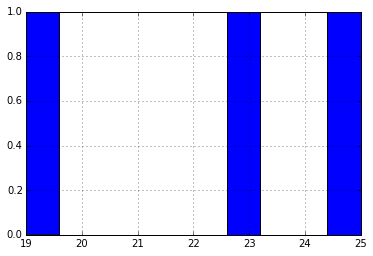

In [76]:
people['age'].hist()

Eww... kind of a gross histogram. We'll make one of some better data later. 

A handy function to know in pandas (I find) are the `drop_na` and `drop_duplicates` methods. These methods **do not operate in place**, so you have to create a new object when you want to use them:

In [86]:
people.dropna()

,name,age,city,nickname,job,state
0,Zachary,25,Tucson,Zach,Teacher,Arizona
2,Atticus,19,Flagstaff,Atti,Student,Arizona


In [87]:
people

,name,age,city,nickname,job,state
0,Zachary,25,Tucson,Zach,Teacher,Arizona
1,Levi,23,Phoenix,NaN,Student,Arizona
2,Atticus,19,Flagstaff,Atti,Student,Arizona


If you're interested in more advanced use of pandas, I'd highly recommend Wes McKinney's book, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do). Wes was a big mover of Pandas in its early days. 

### Problem: Working with real data

Yesterday, we read and parsed a csv file using pysal and some dictionaries. Today, we'll do this using pandas. 

1. Read in the `calempdensity.csv` csv file. What happens to the extra "Geographic Area" Column? 
2. Read in the `counties.txt` csv file. (*If you had to, can you combine the stfips and fips fields to get the 4-code fips?*)
3. Merge the `calemp` data with the `counties` data using `pandas.merge`. Keep only records in California.
4. Make a histogram of the `rv` and `number of employees` fields. 
4. Make a plot of `rv` vs. `number of employees` 

In [177]:
path = pysal.examples.get_path('calempdensity.csv')

In [178]:
data = pandas.read_csv(path)

In [179]:
counties = pandas.read_csv('counties.txt')

In [182]:
data.head(2)

,Geographic Area,Geographic Area.1,Geographic Name,GEONAME,GEOCOMP,STATE,Number of Employees for All Sectors,Number of employees,Class Number,sq. km,emp/sq km
0,05000US06001,6001,"Alameda County, California","Alameda County, California",0,6,630171,630171,5,1910.1,329.92
1,05000US06003,6003,"Alpine County, California","Alpine County, California",0,6,813,813,1,1913.1,0.42


In [196]:
counties.tail(2)

,Unnamed: 0,state,stfips,fips,name,class,rv,fullfips
3233,3233,VI,78,20,St. John Island,H4,3.819584,78020
3234,3234,VI,78,30,St. Thomas Island,H4,4.911567,78030


In [189]:
?pandas.merge

In [197]:
newframe = pandas.merge(data, counties, left_on="Geographic Area.1", right_on="fullfips")

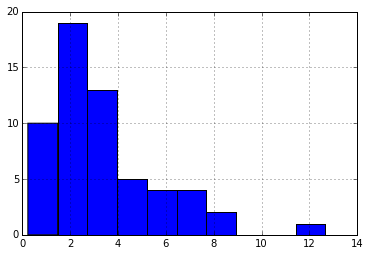

In [202]:
newframe['rv'].hist()